In [26]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [27]:
fmnist_data = keras.datasets.fashion_mnist

In [28]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
x_test.shape

(10000, 28, 28)

In [31]:
y_train.shape

(60000,)

In [32]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

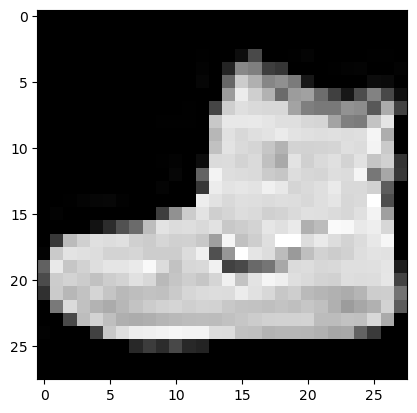

In [33]:
plt.imshow(x_train[0,], cmap="gray")

In [34]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [35]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
     keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
    ])

/media/saeed/9e9baace-4b04-4b10-9642-9956879cddb6/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/media/saeed/9e9baace-4b04-4b10-9642-9956879cddb6/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [37]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Dense name=dense_3, built=True>,
 <BatchNormalization name=batch_normalization_4, built=True>,
 <Activation name=activation_1, built=True>,
 <Dense name=dense_4, built=True>,
 <BatchNormalization name=batch_normalization_5, built=True>,
 <LeakyReLU name=leaky_re_lu_1, built=True>,
 <Dense name=dense_5, built=True>]

In [38]:
weights = model.layers[1].get_weights()

In [39]:
weights

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

# Compile Model

In [40]:
sgd = keras.optimizers.SGD(clipvalue=1.0)

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

# Fit Model

In [42]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.15,
                    callbacks=[tb_callback])

Epoch 1/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7026 - loss: 0.9031 - val_accuracy: 0.8338 - val_loss: 0.4824
Epoch 2/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8283 - loss: 0.4957 - val_accuracy: 0.8474 - val_loss: 0.4356
Epoch 3/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8374 - loss: 0.4585 - val_accuracy: 0.8518 - val_loss: 0.4132
Epoch 4/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8505 - loss: 0.4213 - val_accuracy: 0.8586 - val_loss: 0.3940
Epoch 5/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8552 - loss: 0.4110 - val_accuracy: 0.8613 - val_loss: 0.3852


In [43]:
history.history

{'accuracy': [0.7739999890327454,
  0.8307451009750366,
  0.8423725366592407,
  0.8518823385238647,
  0.856333315372467],
 'loss': [0.6731340289115906,
  0.48864641785621643,
  0.44859007000923157,
  0.4224233031272888,
  0.4064916968345642],
 'val_accuracy': [0.8337777853012085,
  0.8474444150924683,
  0.8517777919769287,
  0.8585555553436279,
  0.8613333106040955],
 'val_loss': [0.48237207531929016,
  0.4356253147125244,
  0.4131782650947571,
  0.3939644694328308,
  0.3851879835128784]}

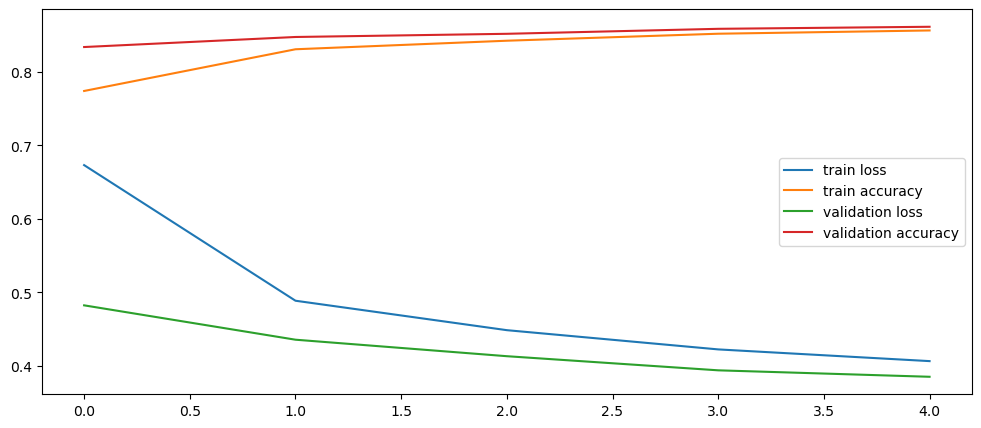

In [44]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,498 (353.51 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

 Optimizer params: 2 (12.00 B)

# Save Model

In [48]:
model.save("model0.keras")
model1 = keras.models.load_model("model0.keras")

In [49]:
model1.layers

[<Flatten name=flatten_1, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Dense name=dense_3, built=True>,
 <BatchNormalization name=batch_normalization_4, built=True>,
 <Activation name=activation_1, built=True>,
 <Dense name=dense_4, built=True>,
 <BatchNormalization name=batch_normalization_5, built=True>,
 <LeakyReLU name=leaky_re_lu_1, built=True>,
 <Dense name=dense_5, built=True>]

In [51]:
model.layers[4].trainable

True